# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-21 20:55:28--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-21 20:55:28--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [12]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [18]:
# prompt: Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords. en Contents

def limpiar_texto(texto):
    texto = texto.lower() # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto) # Eliminar caracteres especiales
    palabras = texto.split() # Tokenizar
    palabras = [palabra for palabra in palabras if palabra not in stop_words] # Eliminar stopwords
    return " ".join(palabras) # Unir las palabras limpias

tweets['cleaned_text'] = tweets['Contents'].apply(limpiar_texto)

# Mostrar algunos ejemplos del texto limpio
print(tweets[['Contents', 'cleaned_text']].head())

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                        cleaned_text  
0  chumeltorres cabrón tí reciben noticias colcho...  
1  alguien tan amable ir hacerme compra mañana ba...  
2  jenniferduquee hahaha si rico nadamas falta pr...  
3  evagelcot ves programa favorito sólo encuentro...  
4  siempre tortilla triunfa mas platos playa http...  


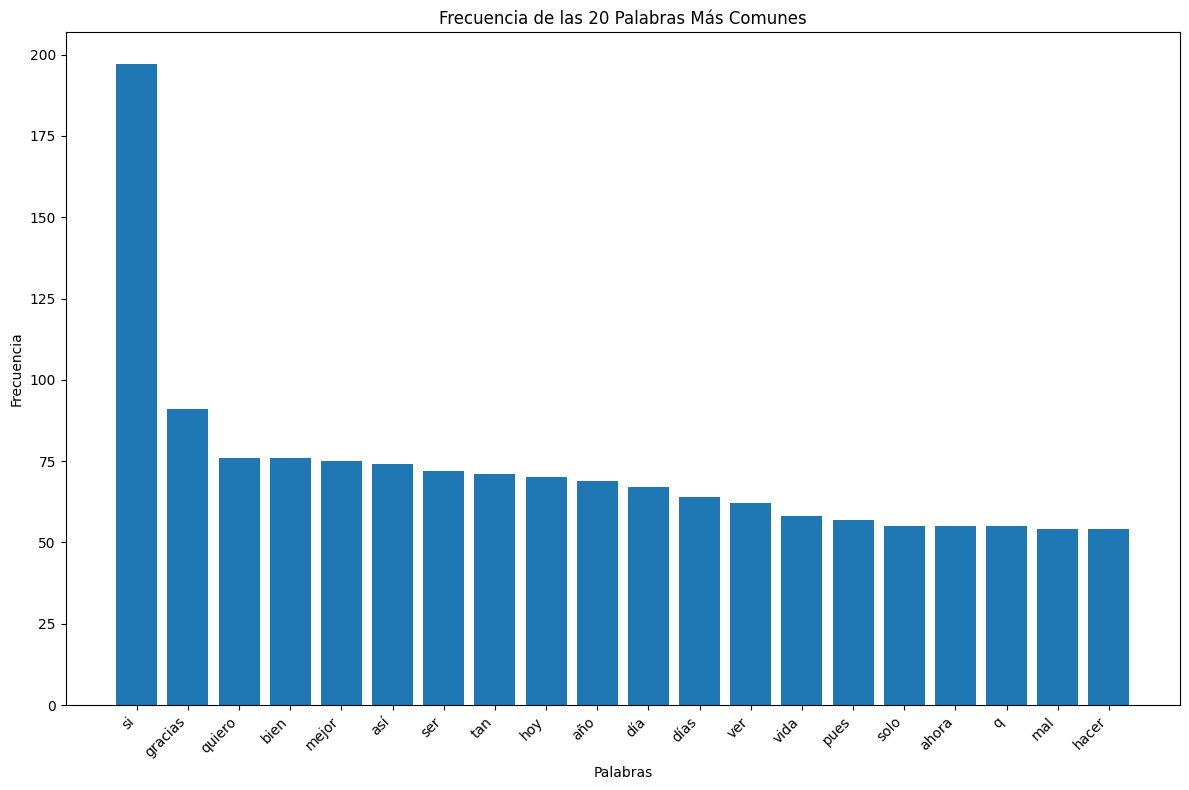

In [19]:
# prompt: haz un grafico de barras con la frecuencia en que se repite cada palabra

# Combinar todos los textos limpios en una sola cadena
all_words = ' '.join(tweets['cleaned_text'])

# Tokenizar las palabras y contar su frecuencia
words = all_words.split()
word_counts = Counter(words)

# Obtener las 20 palabras más comunes para el gráfico
most_common_words = word_counts.most_common(20)
df_most_common_words = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_most_common_words['Palabra'], df_most_common_words['Frecuencia'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 20 Palabras Más Comunes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

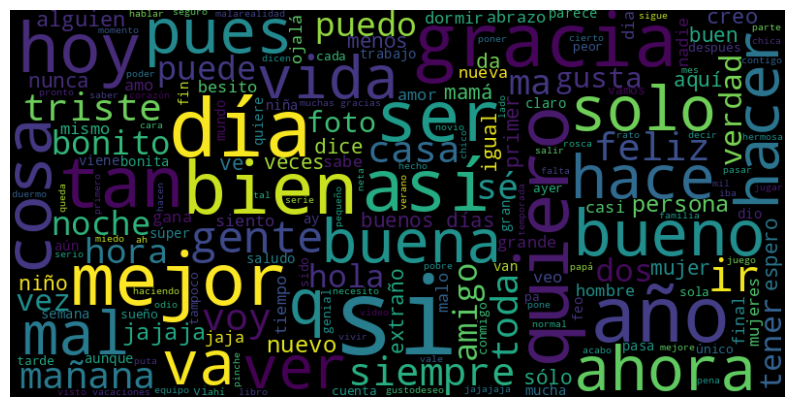

In [21]:
# prompt: haz una nube de palabras

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

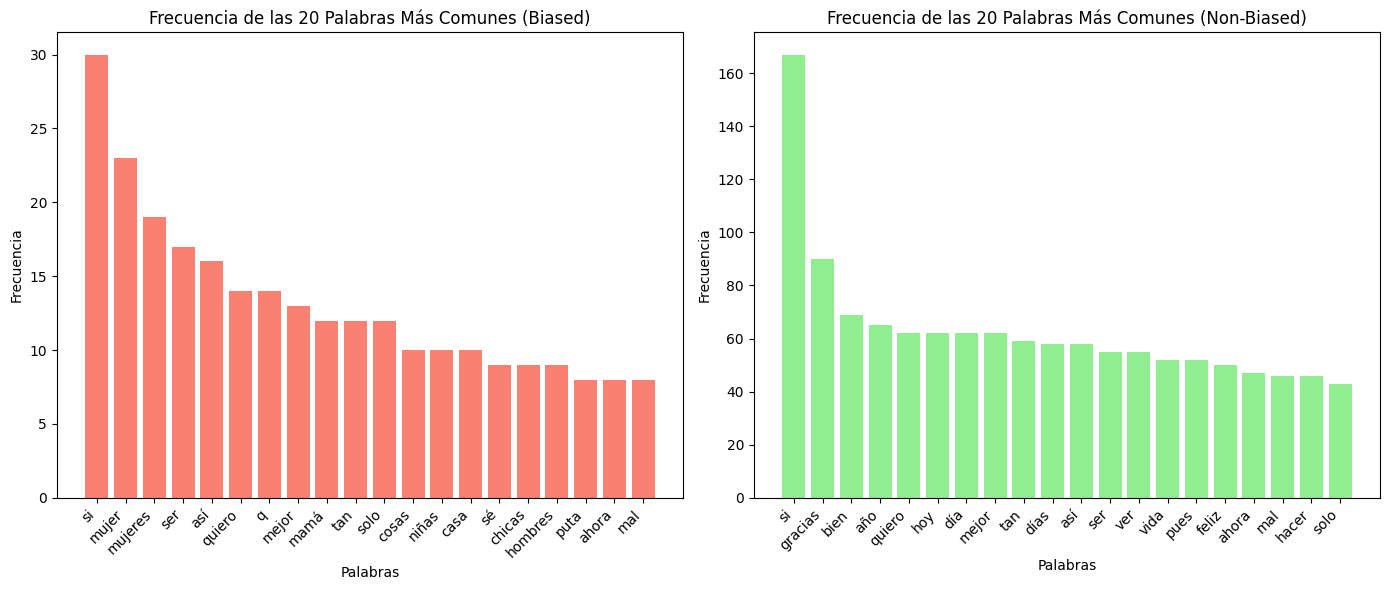

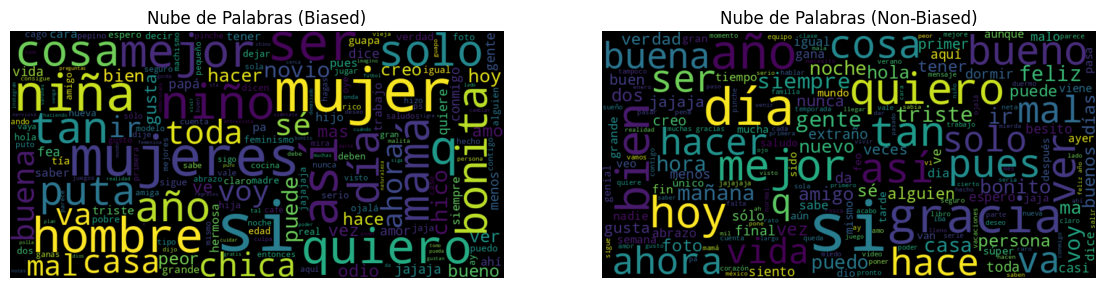

In [22]:
# prompt: Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

# Separar tweets por etiqueta
biased_tweets = tweets[tweets['Label'] == 'biased']['cleaned_text']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['cleaned_text']

# Combinar todos los textos limpios por etiqueta
all_biased_words = ' '.join(biased_tweets)
all_non_biased_words = ' '.join(non_biased_tweets)

# Tokenizar y contar palabras por etiqueta
biased_words = all_biased_words.split()
biased_word_counts = Counter(biased_words)

non_biased_words = all_non_biased_words.split()
non_biased_word_counts = Counter(non_biased_words)

# Obtener las 20 palabras más comunes para cada etiqueta
most_common_biased_words = biased_word_counts.most_common(20)
df_most_common_biased_words = pd.DataFrame(most_common_biased_words, columns=['Palabra', 'Frecuencia'])

most_common_non_biased_words = non_biased_word_counts.most_common(20)
df_most_common_non_biased_words = pd.DataFrame(most_common_non_biased_words, columns=['Palabra', 'Frecuencia'])

# Crear gráficos de barras para cada etiqueta
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(df_most_common_biased_words['Palabra'], df_most_common_biased_words['Frecuencia'], color='salmon')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 20 Palabras Más Comunes (Biased)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(df_most_common_non_biased_words['Palabra'], df_most_common_non_biased_words['Frecuencia'], color='lightgreen')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 20 Palabras Más Comunes (Non-Biased)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Crear nubes de palabras para cada etiqueta
wordcloud_biased = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_biased_words)
wordcloud_non_biased = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_non_biased_words)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de Palabras (Biased)')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de Palabras (Non-Biased)')

plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1. ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
En los tweets biased, aparecen con frecuencia palabras como:

mujer, mujeres, mamá, niñas, chicas, hombres, puta

quiero, mal, ahora

solo, tan, mejor, ser, sí

En comparación, en los tweets non-biased, las palabras más comunes son más neutrales o generales, como:

gracias, bien, año, día, hoy, vida, feliz, hacer

Palabras comunes únicamente en biased:
mujer, mujeres, mamá, niñas, chicas, hombres, puta → Referencias específicas a género o roles sociales.

quiero, solo, tan, mal → Expresiones más subjetivas o emocionales.

2. ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
Sí. Algunas palabras sugieren un sesgo de género o emocional, como:

"puta": uso ofensivo y claramente sesgado.

"mujer", "mujeres", "niñas", "mamá", "chicas", "hombres": el enfoque repetido en género puede indicar sesgo, especialmente si se usan en contextos estereotipados o despectivos.

"quiero", "solo", "mal": palabras subjetivas que pueden reflejar una postura personal o emocional, lo que es típico del lenguaje sesgado.

En contraste, los tweets non-biased usan más palabras neutrales o descriptivas como "gracias", "bien", "vida", "feliz", lo que sugiere un tono más informativo o general.

3. ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?
Las empresas pueden aprovechar esta información de varias formas:

Detección temprana de contenido problemático: Identificar patrones lingüísticos sesgados (como uso de género o insultos) para moderar contenido o prevenir crisis reputacionales.

Análisis de sentimiento segmentado: Distinguir entre opiniones informativas (non-biased) y opiniones emocionales o polarizadas (biased), para adaptar campañas o respuestas de servicio al cliente.

Diseño de comunicación inclusiva: Al observar qué palabras tienden a usarse con sesgo, las empresas pueden ajustar su lenguaje en campañas para ser más inclusivas y evitar estereotipos.

Monitoreo de percepción de marca: Detectar si ciertos productos, servicios o campañas están generando reacciones sesgadas, lo que puede indicar controversias o necesidad de ajustes.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [25]:
# prompt: Usaremos TextBlob para calcular el sentimiento de cada tweet

def get_sentiment(text):
    analysis = TextBlob(text)
    # Devolver la polaridad del sentimiento (-1 a 1)
    return analysis.sentiment.polarity

# Aplicar la función de análisis de sentimiento a cada tweet limpio
tweets['sentiment'] = tweets['cleaned_text'].apply(get_sentiment)

# Mostrar los primeros tweets con su sentimiento calculado
print(tweets[['Contents', 'sentiment', 'Label']].head())

# Calcular el sentimiento promedio para cada etiqueta
average_sentiment_biased = tweets[tweets['Label'] == 'biased']['sentiment'].mean()
average_sentiment_non_biased = tweets[tweets['Label'] == 'non-biased']['sentiment'].mean()

print(f"\nSentimiento promedio para tweets 'biased': {average_sentiment_biased:.2f}")
print(f"Sentimiento promedio para tweets 'non-biased': {average_sentiment_non_biased:.2f}")


                                            Contents  sentiment       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...        0.0      biased
1  ¿alguien es tan amable de ir a hacerme la comp...        0.0  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...        0.2  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...        0.0  non-biased
4  como siempre mi tortilla triunfa mas que otros...        0.0  non-biased

Sentimiento promedio para tweets 'biased': 0.00
Sentimiento promedio para tweets 'non-biased': 0.00


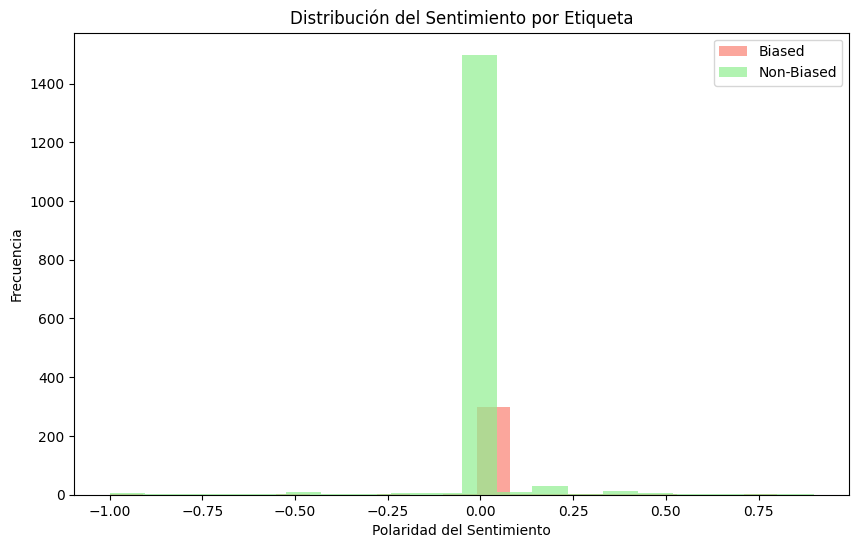

In [27]:

plt.figure(figsize=(10, 6))
tweets[tweets['Label'] == 'biased']['sentiment'].hist(bins=20, alpha=0.7, label='Biased', color='salmon')
tweets[tweets['Label'] == 'non-biased']['sentiment'].hist(bins=20, alpha=0.7, label='Non-Biased', color='lightgreen')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del Sentimiento por Etiqueta')
plt.legend()
plt.grid(False)
plt.show()


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

1. ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?

No existe una diferencia notable:

La gran mayoría de tweets non-biased (verde) tienen una polaridad cercana a cero, lo que indica un tono neutral.

Los tweets biased (rosado) también se concentran en la neutralidad, pero con una distribución ligeramente más dispersa, mostrando presencia en valores negativos (sentimientos negativos) y positivos (aunque mucho menos frecuente).


2. ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
La diferencia sugiere que los tweets sesgados suelen estar más relacionados con emociones o juicios de valor, lo que se refleja en:

Mayor presencia de sentimientos negativos o polarizados.

Uso de un lenguaje más cargado emocionalmente, como se vio en palabras como “puta”, “quiero”, “mal”, etc.

Esto implica que el sesgo en redes sociales no siempre es racional o neutral, sino que frecuentemente está vinculado a reacciones viscerales, personales o ideológicas.

3. ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?
El análisis de sentimientos puede ser una herramienta clave para las empresas, gobiernos o investigadores de opinión pública, de las siguientes maneras:

Aplicaciones concretas:
Monitorear la reacción del público ante una campaña o noticia: Ver si predominan sentimientos positivos, negativos o neutrales.

Detectar controversias o polarización: Una alta cantidad de tweets sesgados con sentimientos negativos puede indicar un conflicto latente o rechazo.

Segmentar audiencias: Ident

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

Text(0.5, 1.0, 'Nube de Palabras (Biased)')

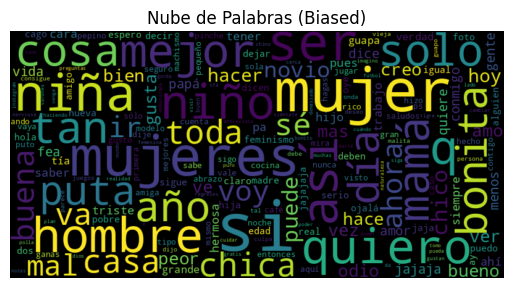

In [29]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_biased, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de Palabras (Biased)')

Text(0.5, 1.0, 'Nube de Palabras (Non-Biased)')

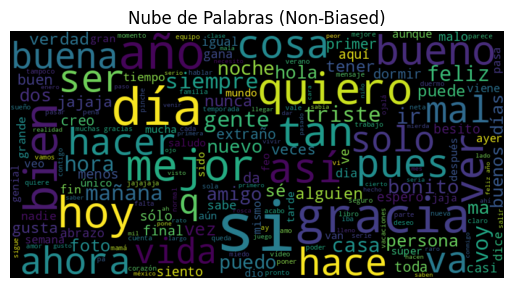

In [31]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_biased, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de Palabras (Non-Biased)')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
Detectar reacciones emocionales al contenido de marca:

Si muchos tweets hacia la marca son biased y negativos, puede significar que los mensajes están siendo malinterpretados o provocan rechazo.

Esto permite corregir tono, lenguaje o enfoque.

Evaluar la neutralidad e inclusión del lenguaje:

Si el análisis de palabras revela sesgos de género, estereotipos o temas delicados, la marca puede adaptar su comunicación hacia una más neutral e inclusiva.

Segmentar audiencias por tono emocional:

Entender qué grupos reaccionan con sesgo permite personalizar mensajes más empáticos o directos, según la audiencia.

Ajustar la estrategia de crisis:

Un aumento de tweets biased con polaridad negativa puede advertir una crisis. La marca puede actuar proactivamente para mitigar daños.

¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
Si los tweets son en su mayoría biased, especialmente con polaridad negativa, se pueden hacer los siguientes ajustes:

Revisión del contenido visual y textual:

Cambiar imágenes, palabras o mensajes que podrían estar generando rechazo o controversia.

Modificación del tono comunicativo:

Usar un tono más empático, menos imperativo o menos polarizante.

Fomentar interacción positiva:

Incentivar respuestas de usuarios satisfechos para equilibrar el sesgo negativo y crear una narrativa más balanceada.

Refuerzo de valores de marca:

Reenfocar la campaña hacia los valores centrales (ej.: inclusión, sostenibilidad, innovación) para recuperar la percepción positiva.

Segmentación más cuidadosa:

Redirigir la campaña a públicos donde el sesgo detectado no cause fricción o malentendidos.

¿Qué patrones importantes se podrían explorar en un análisis futuro?
Para profundizar en el entendimiento de la percepción pública y optimizar decisiones, podrías analizar:

Evolución del sesgo y sentimiento en el tiempo:

Ver si los tweets biased aumentan/disminuyen tras eventos clave, campañas, lanzamientos o controversias.

Análisis geográfico del sesgo:

¿Hay regiones donde el sesgo sea mayor? Esto permitiría adaptar el marketing a contextos culturales.

Distribución horaria o por días de la semana:

Identificar cuándo se publican más tweets con sesgo o carga emocional, útil para planear publicaciones o respuestas.

Análisis temático con NLP (modelos LDA o embeddings):

Identificar temas comunes dentro de los tweets biased vs non-biased. ¿Qué motiva el sesgo?

Influencers o nodos clave del sesgo:

¿Quiénes generan más contenido biased? ¿Tienen impacto en la opinión general? Puedes convertirlos en aliados o responder estratégicamente.

